In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

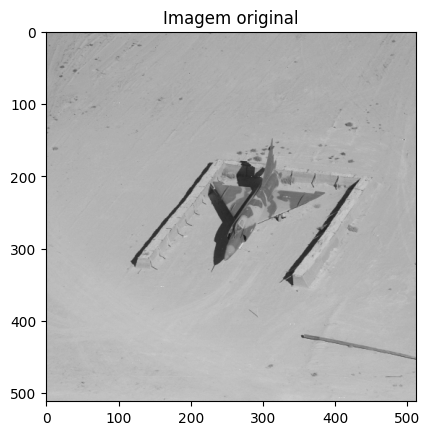

In [32]:
image = cv2.imread('./imgs/7.1.02.tiff')

plt.imshow(image)
plt.title('Imagem original')
plt.show()


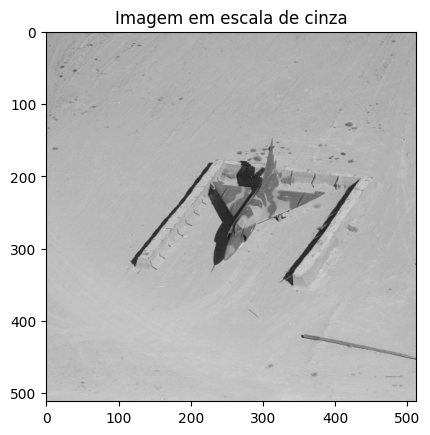

In [33]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.title('Imagem em escala de cinza')
plt.show()

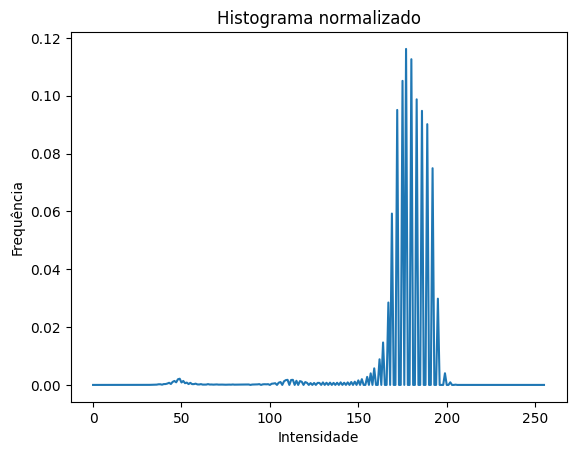

In [5]:
hist_grey = cv2.calcHist([gray], [0], None, [256], [0, 256])
norm_hist = hist_grey / (gray.shape[0] * gray.shape[1])

fig, ax = plt.subplots()
ax.plot(norm_hist)
ax.set_title('Histograma normalizado')
ax.set_xlabel('Intensidade')
ax.set_ylabel('Frequência')
plt.show()


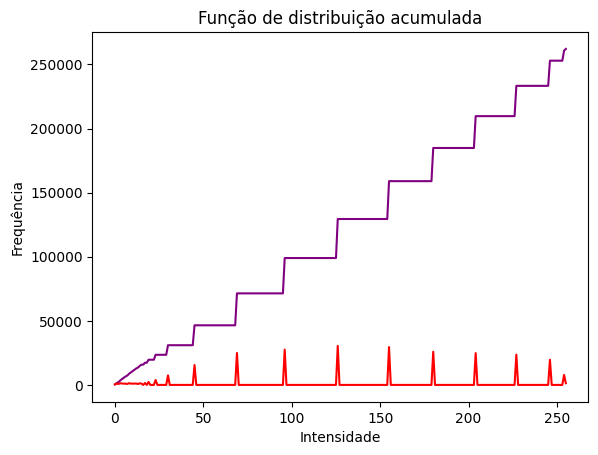

In [20]:
eq_gray = cv2.equalizeHist(gray)
eq_hist = cv2.calcHist([eq_gray], [0], None, [256], [0, 256])
eq_cumulative_distribution_function = eq_hist.cumsum()

fig, ax = plt.subplots()
ax.plot(eq_cumulative_distribution_function,color='purple',label='Função de distribuição acumulada')
ax.plot(eq_hist,color='red',label='Histograma')
ax.set_title('Função de distribuição acumulada')
ax.set_xlabel('Intensidade')
ax.set_ylabel('Frequência')
plt.show()


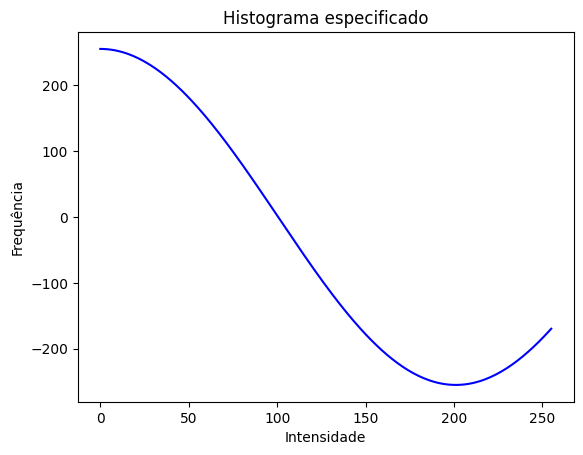

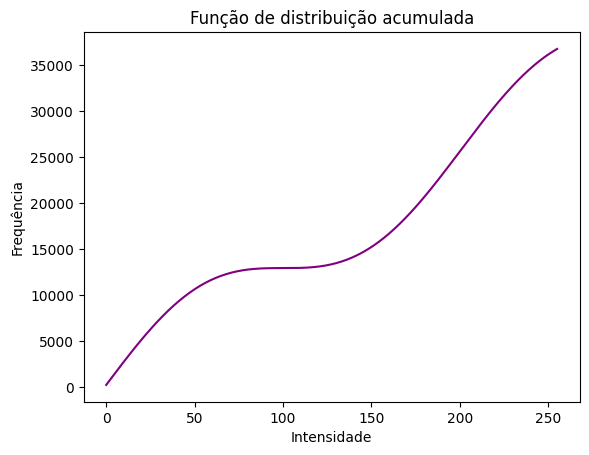

In [25]:
hist_specific = np.zeros(256)
for i in range(256):
    hist_specific[i] = np.cos(i/64)**2 * 255
hist_specific_cumulative = hist_specific.cumsum()

fig, ax = plt.subplots()
ax.plot(hist_especific,color='blue',label='Histograma especificado')
ax.set_title('Histograma especificado')
ax.set_xlabel('Intensidade')
ax.set_ylabel('Frequência')
plt.show()


fig, ax = plt.subplots()
ax.plot(hist_specific_cumulative,color='purple',label='Função de distribuição acumulada')
ax.set_title('Função de distribuição acumulada')
ax.set_xlabel('Intensidade')
ax.set_ylabel('Frequência')
plt.show()


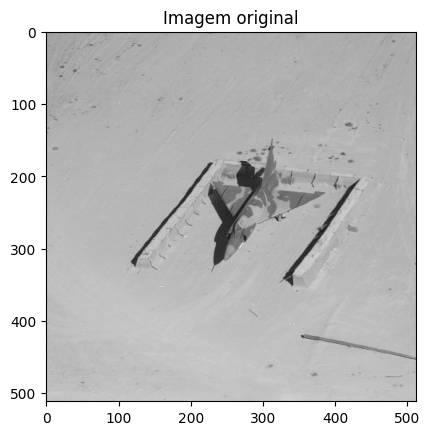

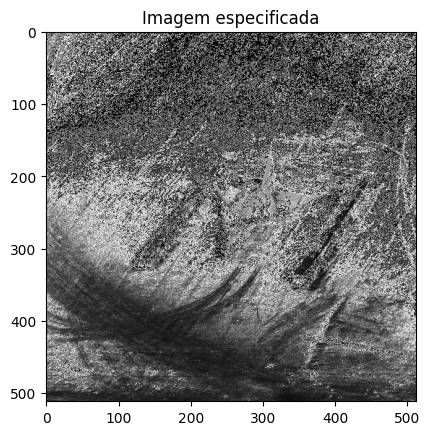

In [31]:
mapping = np.zeros(image.shape)
mapping = mapping.astype('uint8')
for i in range(256):
    mapping[gray == i] = hist_specific_cumulative[i]

plt.imshow(gray, cmap='gray')
plt.title('Imagem original')
plt.show()

plt.imshow(mapping, cmap='gray')
plt.title('Imagem especificada')
plt.show()